# set up

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

In [3]:
dpath = "/content/drive/MyDrive/finaltask/"

# 1

In [4]:
tel = pd.read_csv(dpath+ 'telecom_churn.csv')

In [5]:
tel.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
tel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# a) Please provide any useful information (e.g., figures, tables, etc.) to understand the telecom market.
selected_columns = ['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
tel[selected_columns].describe()

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df = tel

# 'Churn' 변수를 숫자형으로 변환 (True를 1, False를 0으로)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'True' or x == True else 0)

# 숫자형 데이터만 추출 (불필요한 문자열 데이터 제거)
numeric_df = df.drop(columns=['State', 'Area code', 'International plan', 'Voice mail plan'])

# 상관관계 계산
correlation_matrix = numeric_df.corr()

# Churn과 다른 지표들과의 상관관계 추출
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
churn_corr

Churn                     1.000000
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Total night calls         0.006141
Total intl calls         -0.052844
Number vmail messages    -0.089728
Name: Churn, dtype: float64

In [ ]:
# 이탈 여부에 대한 비율 계산
churn_rate = tel['Churn'].value_counts(normalize=True) * 100
churn_rate

Churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

In [ ]:
# 고객 서비스 센터에 대한 전화 수에 따른 이탈률 계산
churn_by_cust_service_calls = tel.groupby('Customer service calls')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_cust_service_calls

Churn,False,True
Customer service calls,,
0,86.800574,13.199426
1,89.669771,10.330229
2,88.537549,11.462451
3,89.743590,10.256410
4,54.216867,45.783133
5,39.393939,60.606061
6,36.363636,63.636364
7,44.444444,55.555556
8,50.000000,50.000000


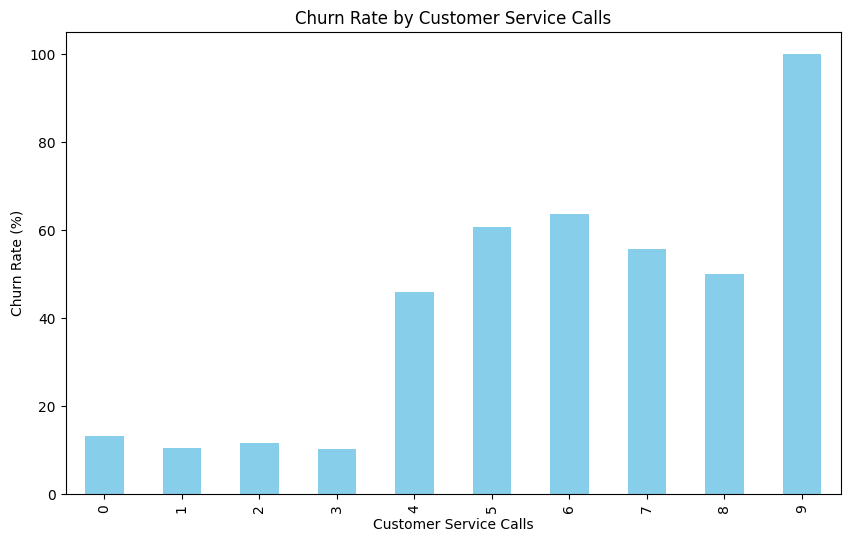

In [ ]:
# 고객 서비스 콜 수에 따른 이탈률 계산
churn_by_cust_service_calls = df.groupby('Customer service calls')['Churn'].mean() * 100

# 시각화
plt.figure(figsize=(10, 6))
churn_by_cust_service_calls.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Churn Rate (%)')
plt.show()

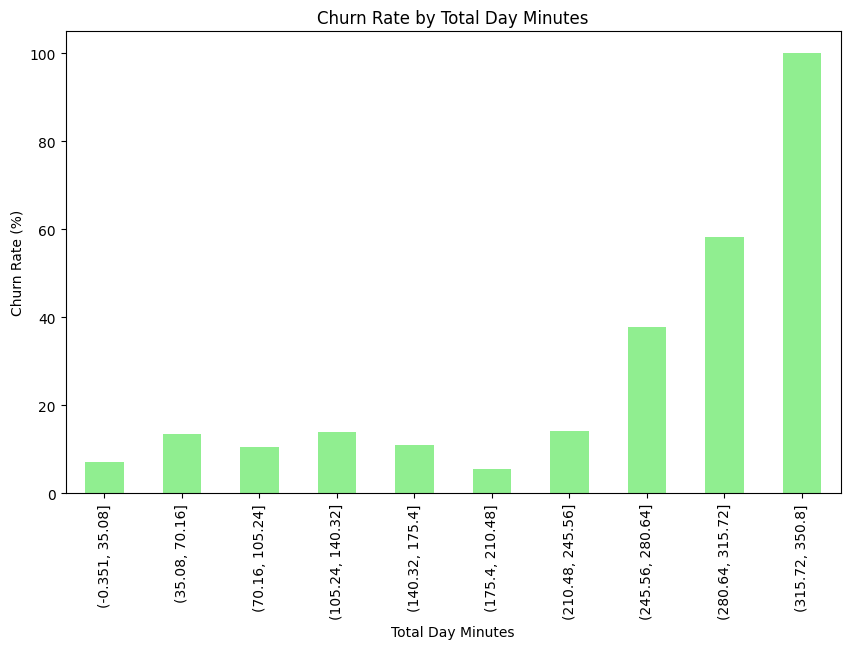

In [ ]:
# Total day minutes를 범주화하여 이탈률 계산
df['Total day minutes category'] = pd.cut(df['Total day minutes'], bins=10)
churn_by_day_minutes = df.groupby('Total day minutes category')['Churn'].mean() * 100

# 시각화
plt.figure(figsize=(10, 6))
churn_by_day_minutes.plot(kind='bar', color='lightgreen')
plt.title('Churn Rate by Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Churn Rate (%)')
plt.show()

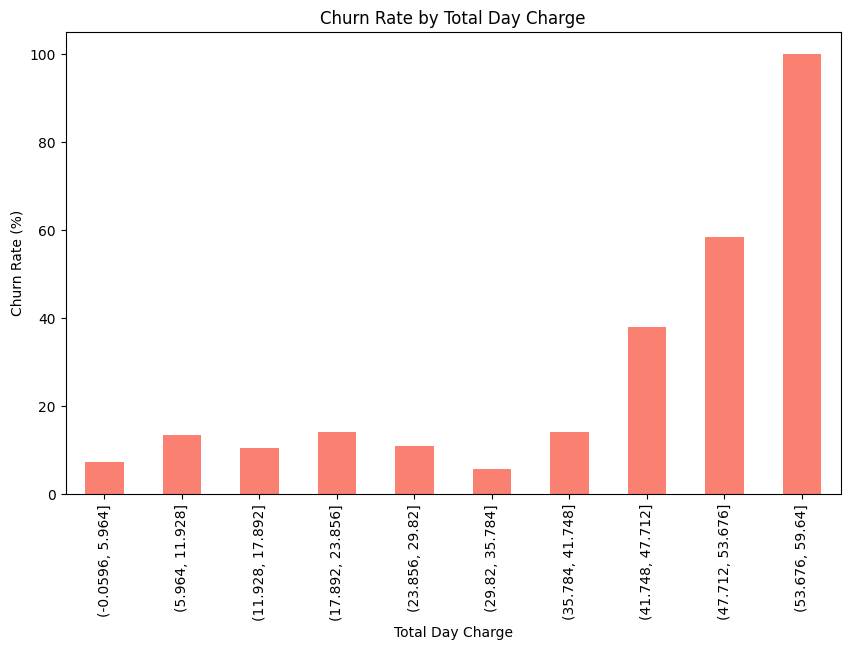

In [ ]:
# Total day charge를 범주화하여 이탈률 계산
df['Total day charge category'] = pd.cut(df['Total day charge'], bins=10)
churn_by_day_charge = df.groupby('Total day charge category')['Churn'].mean() * 100

# 시각화
plt.figure(figsize=(10, 6))
churn_by_day_charge.plot(kind='bar', color='salmon')
plt.title('Churn Rate by Total Day Charge')
plt.xlabel('Total Day Charge')
plt.ylabel('Churn Rate (%)')
plt.show()

In [11]:
# 'Churn' 변수를 숫자형으로 변환 (True를 1, False를 0으로)
tel['Churn'] = tel['Churn'].apply(lambda x: 1 if x == 'True' or x == True else 0)

# 특성과 타겟 변수 분리
X = tel.drop(columns=['Churn'])
y = tel['Churn'].astype('int')  # 이탈 여부를 0과 1로 변환

# 범주형 변수를 더미 변수로 변환
X = pd.get_dummies(X)

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature 이름 확인
print(X_train.columns)

# 로지스틱 회귀
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

# 랜덤 포레스트
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

# 모델별 정확도 출력
print(f'Logistic Regression Accuracy: {logreg_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'XGBoost Accuracy: {xgb_accuracy}')

print(f"Logistic Regression F1 Score: {logreg_f1:.4f}")
print(f"Random Forest F1 Score: {rf_f1:.4f}")
print(f"XGBoost F1 Score: {xgb_f1:.4f}")

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'State_AK', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State_